In [34]:
import cv2
import matplotlib.patches as patches

import matplotlib.pyplot as plt
%matplotlib inline

##讀入照片
image=cv2.imread('Dog.JPG')

##因為CV2會將照片讀成BGR，要轉回來
image=image[:,:,::-1]

## 先設BBOX格式為[X,Y,W,H]
## 也就是左上角那一點的座標以及BBOX的寬和高

In [35]:
Ground_Truth_BBOX=[1900,700,1800,1800]
Prediction_BBOX=[1800,800,1500,1500]

## 轉換成 [X0,Y0,X1,Y1]

In [36]:
Ground_Truth_BBOX_Transform=[Ground_Truth_BBOX[0],Ground_Truth_BBOX[1],Ground_Truth_BBOX[0]+Ground_Truth_BBOX[2],Ground_Truth_BBOX[1]+Ground_Truth_BBOX[3]]
Prediction_BBOX_Transform=[Prediction_BBOX[0],Prediction_BBOX[1],Prediction_BBOX[0]+Prediction_BBOX[2],Prediction_BBOX[1]+Prediction_BBOX[3]]

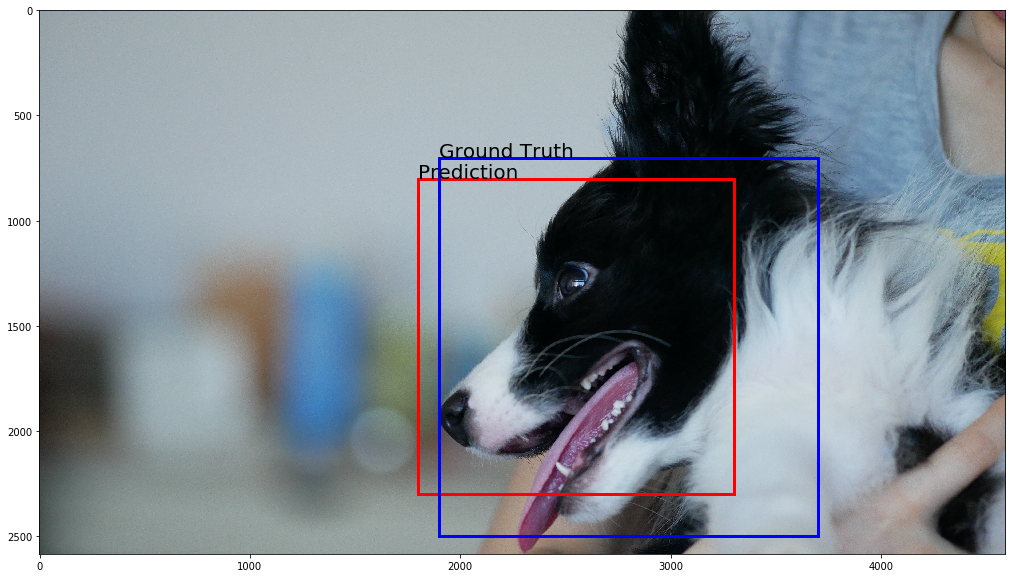

In [37]:
plt.rcParams['figure.figsize'] = (20, 10)


fig,ax = plt.subplots(1)

##畫出圖片
ax.imshow(image)

# 畫BBOX-Prediction
rect = patches.Rectangle((Prediction_BBOX[0],Prediction_BBOX[1]),Prediction_BBOX[2],Prediction_BBOX[3],linewidth=3,edgecolor='r',facecolor='none',)
ax.text(1800,800,'Prediction',withdash=True,size=20)
# 畫BBOX-Ground_Truth
rect_1 = patches.Rectangle((Ground_Truth_BBOX[0],Ground_Truth_BBOX[1]),Ground_Truth_BBOX[2],Ground_Truth_BBOX[3],linewidth=3,edgecolor='b',facecolor='none')
ax.text(1900,700,'Ground Truth',withdash=True,size=20)

# Add the patch to the Axes
ax.add_patch(rect)
ax.add_patch(rect_1)



plt.show()

## 定義IOU計算

In [44]:
def bb_intersection_over_union(boxA, boxB):
    # determine the (x, y)-coordinates of the intersection rectangle
    yA = max(boxB[1],boxA[1])
    xA = max(boxB[0],boxA[0])
    yB = min(boxB[3],boxA[3])
    xB = min(boxB[2],boxA[2])

    # xA = '''找出比較大的X0'''
    # yA = '''找出比較大的y0'''
    # xB = '''找出比較小的X1'''
    # yB = '''找出比較小的y1'''

    print(boxB)
    print(boxA)
    print(yA,xA,yB,xB)
    ## 計算交集區域
    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
    # interArea = float(interArea)
    
    ## 計算各自的BBOX大小
    boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)

    union = boxAArea + boxBArea - interArea
    # union = float(union)
    

    ## 計算IOU
    iou = interArea / union

    # return the intersection over union value
    return iou

In [45]:
IOU=bb_intersection_over_union(Ground_Truth_BBOX_Transform, Prediction_BBOX_Transform)

[1800, 800, 3300, 2300]
[1900, 700, 3700, 2500]
800 1900 2300 3300


In [46]:
print('IOU值：',IOU) 
'''應該要得到0.6196482836879266'''

IOU值： 0.6196482836879266


'應該要得到0.6196482836879266'